# 데이터 컬럼 설명

### 전체컬럼

범주형     
COMPONENT_ARBITRARY : 오일 관련 부품(4종)  
YEAR : 오일 샘플 및 진단 년도  
FOPTIMETHGLY : 비식별화(관련 정보를 찾을 수 없음)  
Y_LABEL : 오일정상여부(정상 : 0, 이상 : 1)
  
연속형    
ANONYMOUS_1 : 의미불명  
SAMPLE_TRANSFER_DAY : 샘플링 후 진단기관으로 이동한 기간   
ANONYMOUS_2 : 의미불명  
AG : 은 함유량    
AL : 알루미늄 함유량    
B : 붕소 함유량    
BA : 바륨 함유량  
BE : 베릴륨 함유량  
CA : 칼슘 함유량  
CD : 카드뮴 함유량  
CO : 코발트 함유량  
CR : 크로뮴 함유량  
CU : 구리 함유량  
FH2O : 물 수치  
FNOX : 질소산화물 수치  
FOXID : 산화반응 수치  
FSO4 : 황산염 수치  
FTBN : 염기성 첨가제물질 수치  
FE : 철 함유량  
FUEL : 연료 함유량    
H2O : 물 함유량  
K : 포타슘 함유량  
LI : 리튬 함유량    
MG : 마그네슘 함유량  
MN : 망가니즈(망간) 함유량  
MO : 몰리브데넘 함유량  
NA : 소듐 함유량  
NI : 니켈 함유량  
P : 인 함유량  
PB : 납 함유량  
PQINDEX : 특정 수량 인덱스(의미불명)  -> 금속 함량을 상대적으로 측정한 것, 일반적으로 높을수록 철 재료의 농도가 높아짐  
S : 황 함유량    
SB : 안티모니 함유량  
SI : 실리콘 함유량  
SN : 주석 함유량  
SOOTPERCENTAGE : 그을음 %  
TI : 타이타늄 함유량  
U100, 75, 50, 25, 20, 14, 6, 4 : x 이상 크기 입자   
V : 바나듐 함유량  
V100 : 100도에서의 점도지수  
V40 : 40도에서의 점도지수  
ZN : 아연 함유량  


### 실제 사용한 컬럼

범주형   
COMPONENT_ARBITRARY : 오일 관련 부품(4종)  
YEAR : 오일 샘플 및 진단 년도  
Y_LABEL : 오일정상여부(정상 : 0, 이상 : 1)  
  
연속형     
ANONYMOUS_1 : 의미불명   
ANONYMOUS_2 : 의미불명  
AG : 은 함유량  
CO : 코발트 함유량  
CR : 크로뮴 함유량  
CU : 구리 함유량  
FE : 철 함유량  
H2O : 물 함유량  
MN : 망가니즈(망간) 함유량  
MO : 몰리브데넘 함유량  
NI : 니켈 함유량  
PQINDEX : 특정 수량 인덱스(의미불명) -> 금속 함량을 상대적으로 측정한 것, 일반적으로 높을수록 철 재료의 농도가 높아짐  
TI : 타이타늄 함유량  
V : 바나듐 함유량  
V40 : 40도에서의 점도지수  
ZN : 아연 함유량  

# 라이브러리 import + train, test 불러오기

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/competition_data/dacon/oil_status/train.csv')
test = pd.read_csv('/content/drive/MyDrive/competition_data/dacon/oil_status/test.csv')

# 단일값 존재여부 확인

In [ ]:
# 한 개의 값만 가지는 컬럼이 있는지 확인합니다 -> 존재하지 않습니다
for i in train.columns:
    if len(train[i].value_counts()) ==1:
        print(i)

# 기본 train값 확인

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

In [ ]:
# 정제의 편리함을 위하여 컬럼명을 변경하겠습니다 -> 소문자화
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [ ]:
train.isnull().sum()

id                         0
component_arbitrary        0
anonymous_1                0
year                       0
sample_transfer_day        0
anonymous_2                0
ag                         0
al                         0
b                          0
ba                         0
be                         0
ca                         0
cd                      1394
co                         0
cr                         0
cu                         0
fh2o                   10205
fnox                   10205
foptimethgly           10205
foxid                  10205
fso4                   10205
ftbn                   10205
fe                         0
fuel                   10205
h2o                        0
k                       2299
li                         0
mg                         0
mn                         0
mo                         0
na                         0
ni                         0
p                          0
pb                         0
pqindex       

In [ ]:
test.isnull().sum()

id                     0
component_arbitrary    0
anonymous_1            0
year                   0
anonymous_2            0
ag                     0
co                     0
cr                     0
cu                     0
fe                     0
h2o                    0
mn                     0
mo                     0
ni                     0
pqindex                0
ti                     0
v                      0
v40                    0
zn                     0
dtype: int64

- 결측값이 1만개 이상인 것은 제거하겠습니다

In [ ]:
dropped_list = []
for i in train.columns:
    if len(train[train[i].isna()])>10000:
        dropped_list.append(i)

train.drop(dropped_list, axis = 1, inplace = True)

In [ ]:
len(train.columns), len(test.columns)

(37, 19)

- train과 test에 컬럼 갯수가 동일하지 않습니다. 동일하게 맞추기 위해 일부 컬럼을 drop시키겠습니다

In [ ]:
for i in train.columns:
    if (i not in test.columns) & (i != "y_label"):
        train.drop(i, axis = 1, inplace = True)

In [ ]:
len(train.columns), len(test.columns)

(20, 19)

- 동일하게 컬럼 갯수를 맞추었습니다. train 값을 확인해보겠습니다

In [ ]:
train.head(2)

,id,component_arbitrary,anonymous_1,year,anonymous_2,ag,co,cr,cu,fe,h2o,mn,mo,ni,pqindex,ti,v,v40,zn,y_label
0,TRAIN_00000,COMPONENT3,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652,0


In [ ]:
train.describe()

,anonymous_1,year,anonymous_2,ag,co,cr,cu,fe,h2o,mn,mo,ni,pqindex,ti,v,v40,zn,y_label
count,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000
mean,3146.082937,2013.652501,387.416885,0.025825,0.028166,3.299468,34.560624,178.169280,0.033650,2.787939,23.992409,0.730117,415.159631,0.707911,0.050656,109.355815,588.646825,0.085349
std,4216.089809,3.964758,550.016073,0.171926,0.314249,28.595510,128.958953,533.208976,0.809162,11.131836,59.833922,3.806716,1528.191012,6.897579,0.475438,49.612379,531.743393,0.279411
min,1000.000000,2007.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.900000,0.000000,0.000000
25%,1655.000000,2010.000000,200.000000,0.000000,0.000000,0.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,71.800000,37.000000,0.000000
50%,2227.000000,2014.000000,200.000000,0.000000,0.000000,1.000000,4.000000,41.000000,0.000000,1.000000,1.000000,0.000000,29.000000,0.000000,0.000000,111.300000,520.000000,0.000000
75%,3797.000000,2017.000000,410.000000,0.000000,0.000000,3.000000,17.000000,139.000000,0.000000,2.000000,7.000000,0.000000,181.000000,0.000000,0.000000,137.200000,1119.000000,0.000000
max,294451.000000,2022.000000,9650.000000,3.000000,27.000000,2398.000000,5701.000000,31706.000000,52.700000,877.000000,419.000000,176.000000,56761.000000,403.000000,17.000000,2840.500000,2132.000000,1.000000


# EDA

In [ ]:
x_train = train.drop(["id"], axis = 1)
y_train = train["y_label"]
x_test = test.drop("id", axis = 1)

In [ ]:
x_train.head(2)

,component_arbitrary,anonymous_1,year,anonymous_2,ag,co,cr,cu,fe,h2o,mn,mo,ni,pqindex,ti,v,v40,zn,y_label
0,COMPONENT3,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75,0
1,COMPONENT2,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652,0


### 전체 값 상관관계 확인

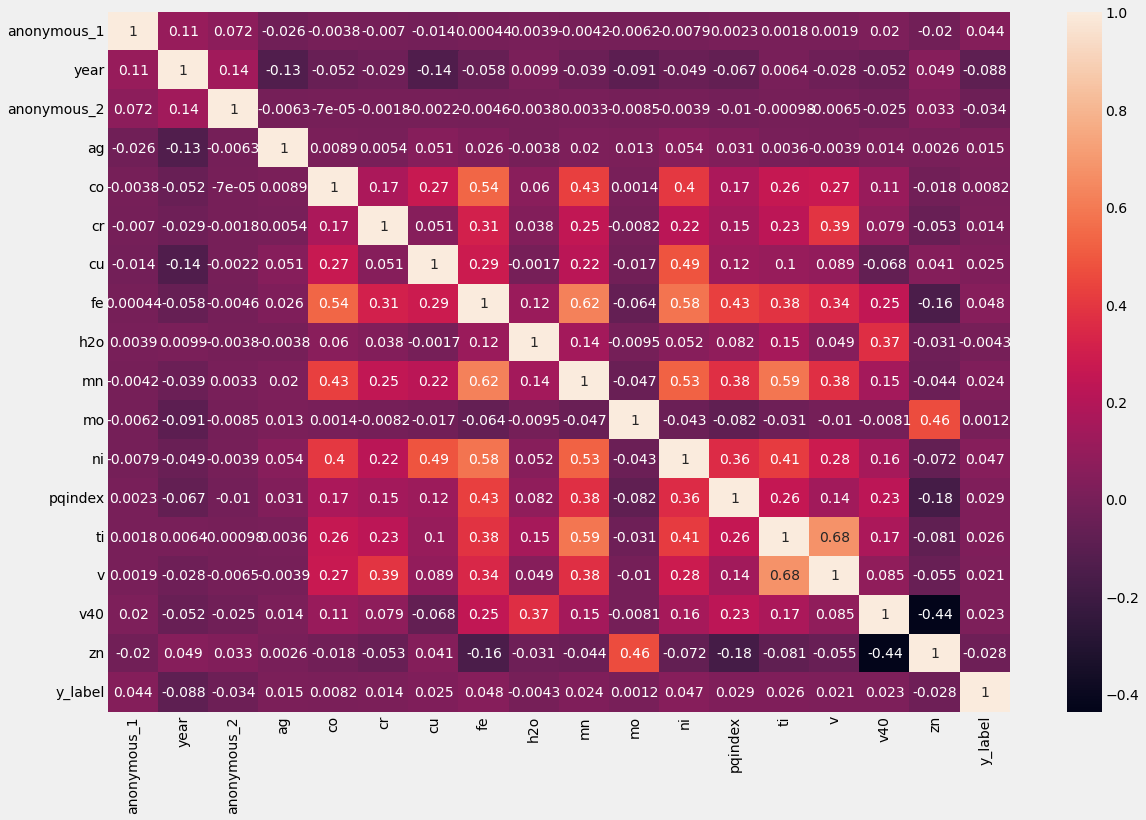

In [ ]:
plt.figure(figsize = (18,12))
sns.heatmap(x_train.corr(), annot = True)

- anonymous_1, anonymous_2의 컬럼이 무엇인지는 모르겠으나, year과의 상관관계가 높습니다. 
- ag(은), h2o(물), mo(몰데브니엄)을 제외하고는 첨가된 성분간 상관관계가 제법 보입니다. 분포가 비슷하다면 해당 특성을 제거하는 것이 좋을 것입니다.
- 점도와 첨가된 성분간 상관관계도 높습니다. 

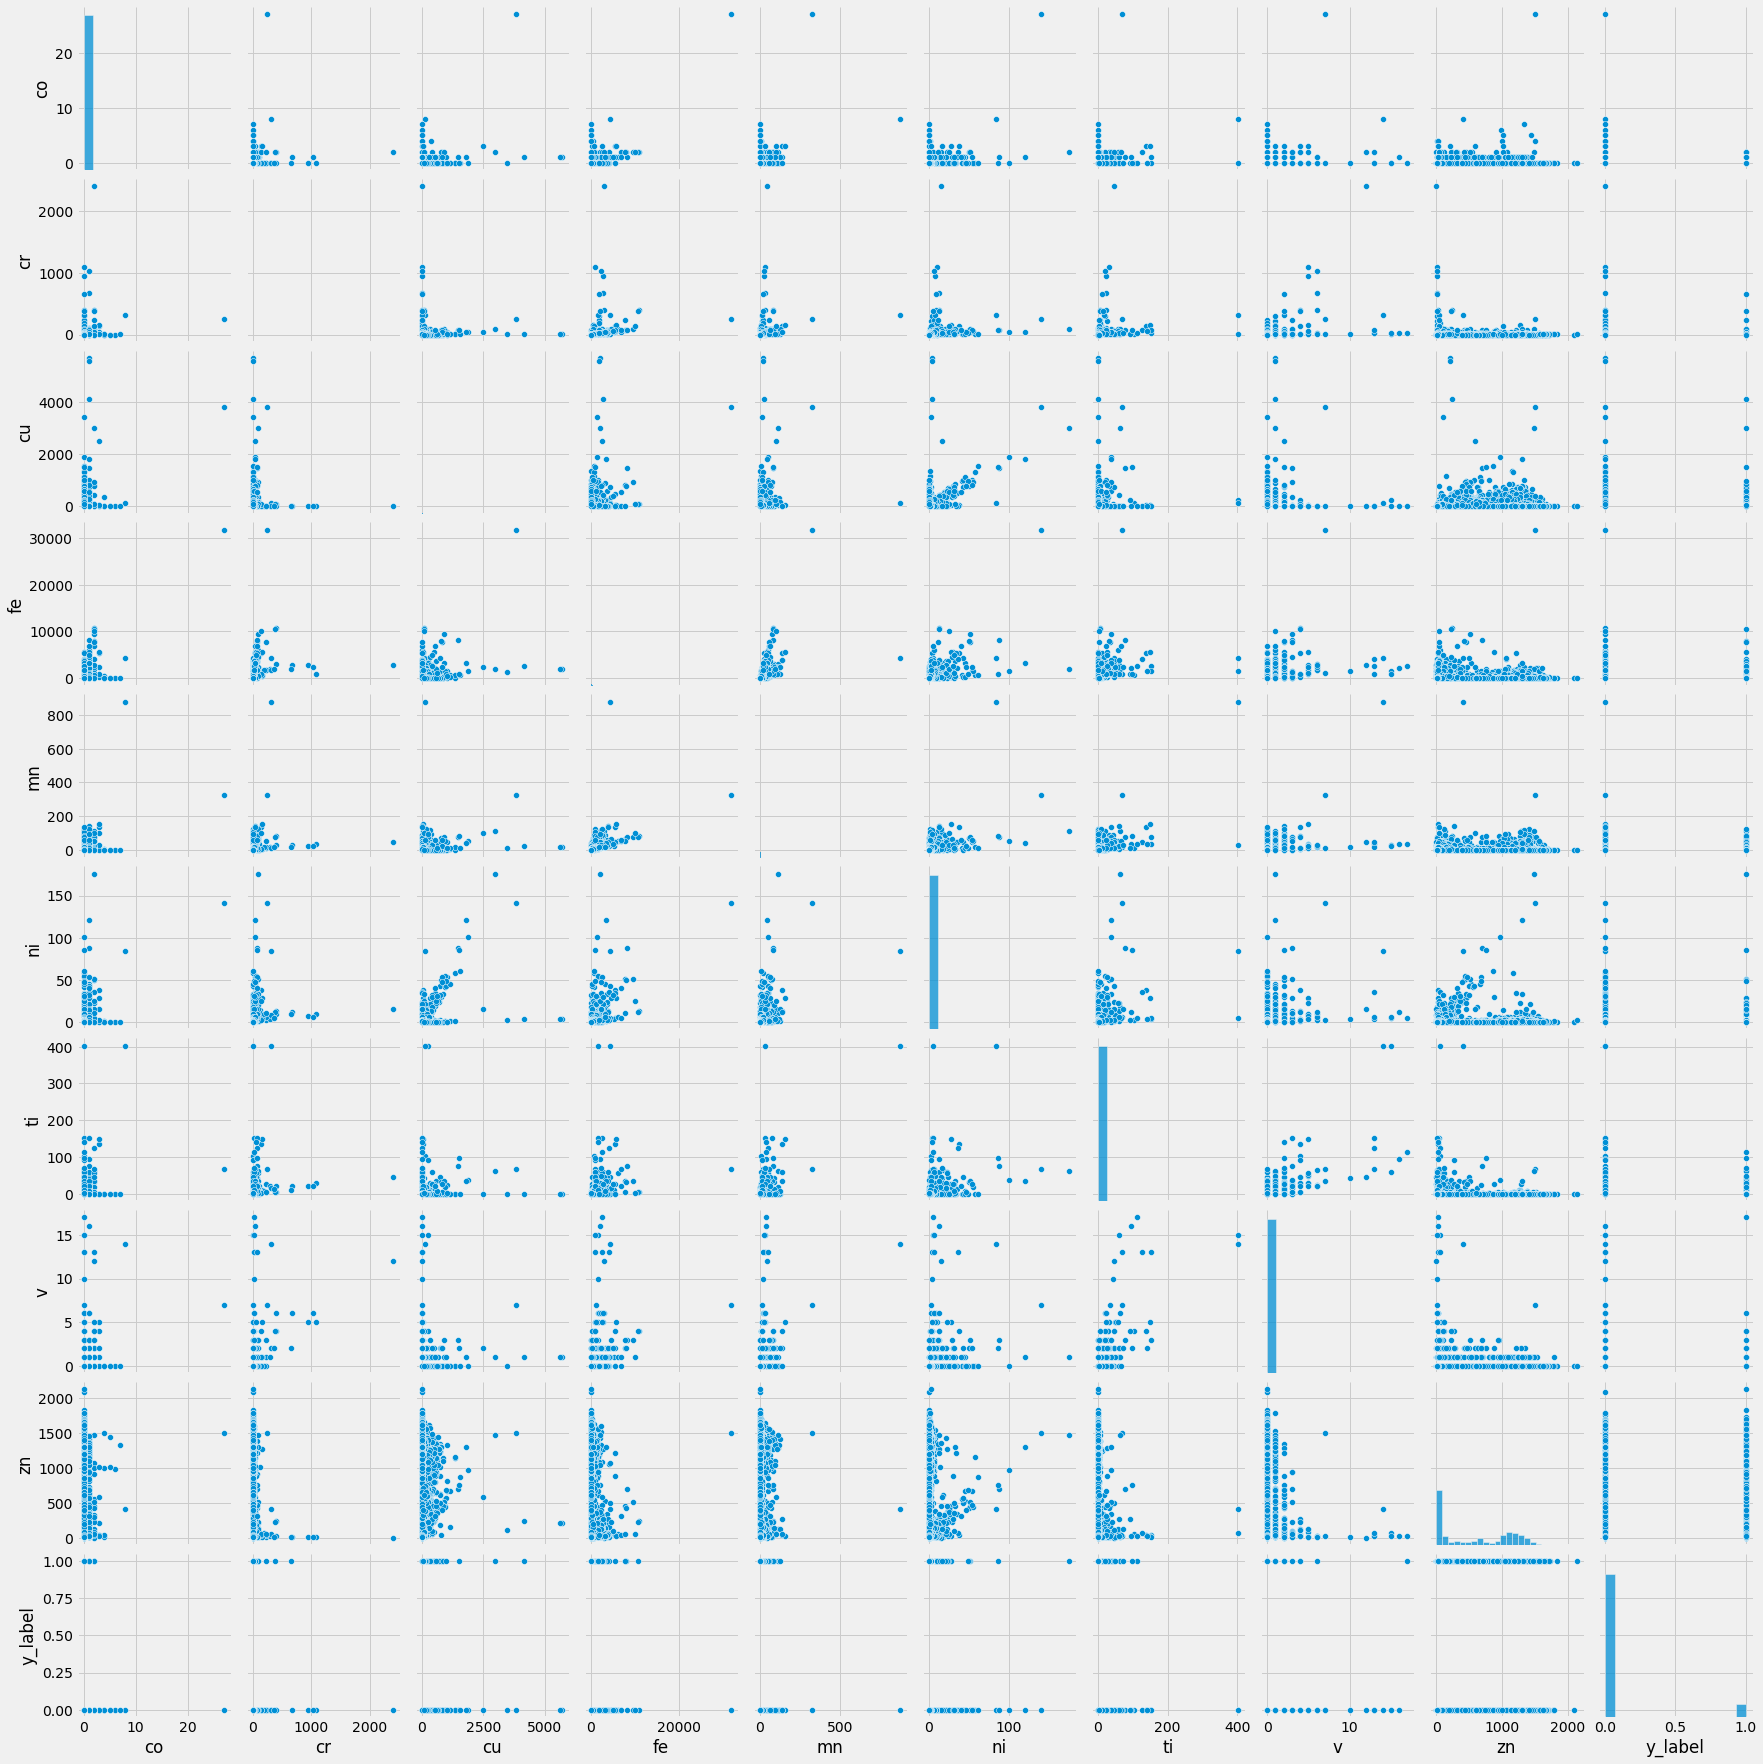

In [ ]:
temp_train = x_train[["co","cr","cu","fe","mn","ni", "ti", "v","zn","y_label"]]
sns.pairplot(temp_train)

- 아연과 다른 컬럼들과의 일부 선형성이 보입니다. 해당 컬럼을 제거하겠습니다.
- 피어슨 상관관계를 통해 보았을 때 대체적으로 성분간 연관성이 높은 것으로 보였으나 pairplot을 통해 확인해 보았을 때 선형성을 보이는 항목은 찾기가 어렵습니다.

In [ ]:
# zn(아연)과 다른 컬럼간의 일부 선형성이 보이기 때문에 제거하겠습니다.
x_train.drop("zn", axis = 1, inplace = True)
x_test.drop("zn", axis = 1, inplace = True)

# pqindex는 금속함량을 측정한 것인데, 다른 금속 함량에 대한 특성이 존재하므로 제거하겠습니다
x_train.drop("pqindex", axis = 1, inplace = True)
x_test.drop("pqindex", axis = 1, inplace = True)

### y_label 확인

y_label
0    12892
1     1203
Name: y_label, dtype: int64

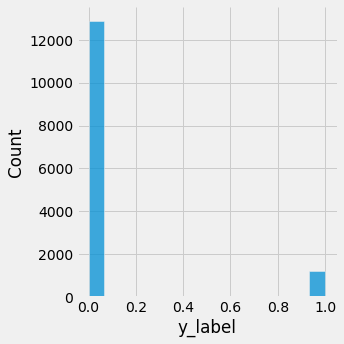

In [ ]:
sns.displot(x_train.y_label)
x_train.groupby("y_label")["y_label"].count()

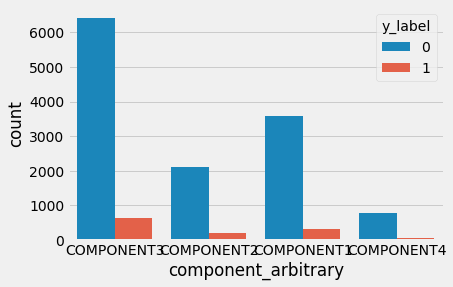

In [ ]:
sns.countplot(x = x_train.component_arbitrary, hue = x_train.y_label)

- 매우 불균등한 라벨을 보유중입니다.
- upsampling, downsampling을 사용하지 않는 이상 target == 1의 값이 훈련 데이터 셋에 비율에 맞게 잘 들어가야 할 것입니다.
- component 별 비정상인 오일값(y_label = 1)이 너무 적습니다. 과적합 될 우려가 있지만 추후 비율을 비슷하게 맞춰주겠습니다

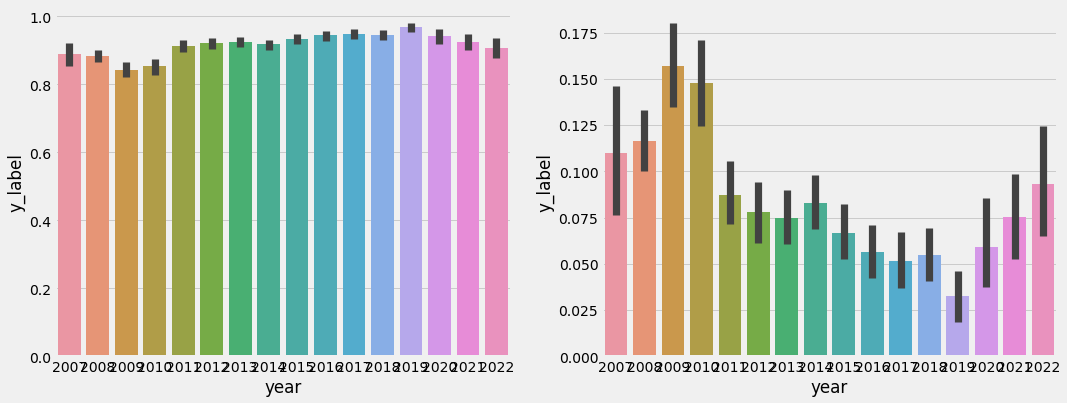

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
sns.barplot(x = x_train.year, y = x_train.y_label == 0, ax = ax[0])
sns.barplot(x = x_train.year, y = x_train.y_label == 1, ax = ax[1])

- 정상 오일은 신뢰구간이 좁으나, 비정상 오일은 신뢰구간이 넓습니다.
- 비정상 오일은 정상 오일에 비해 연도별로 관측되는 범위가 다르기 때문에 유용하게 사용할 수 있을 것입니다

### anonymous_1, anonymous_2

In [ ]:
x_train.anonymous_1.value_counts()

1000    183
1364     58
1359     53
1352     50
1361     50
       ... 
5580      1
2939      1
2577      1
3209      1
1637      1
Name: anonymous_1, Length: 2951, dtype: int64

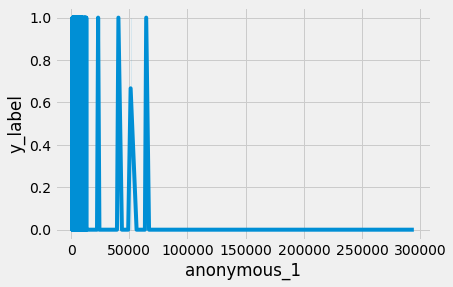

In [ ]:
sns.lineplot(x = x_train.anonymous_1, y = train.y_label)

In [ ]:
x_train.anonymous_1.sort_values(ascending=False).head(10)

5970     294451
13469    123788
3876      89350
8511      78418
212       78418
6551      71569
6809      71223
4469      68537
4196      68537
6415      67013
Name: anonymous_1, dtype: int64

- anonymous_1이 어느 값을 의미하는지 알 수 없지만, 약 7만이 초과한다면 항상 정상오일로 판단할 수 있습니다.
- 하지만 7만이 초과하는 oil의 값은 7개 밖에 없습니다.
- y_label의 값이 1.0인 값들이 종종 관측되는 것으로 보아 사용가능할 것으로 보입니다.

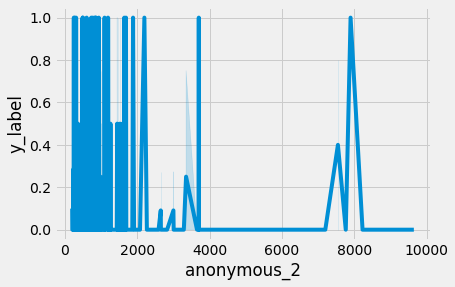

In [ ]:
sns.lineplot(x = x_train.anonymous_2, y = x_train.y_label)

In [ ]:
x_train.anonymous_2.sort_values(ascending=False).head(136)

3181    9650
1881    9650
9406    9650
2506    9650
2009    8250
        ... 
3025    2292
4765    2266
2649    2197
4568    2076
4398    1999
Name: anonymous_2, Length: 136, dtype: int64

In [ ]:
136/14095 * 100 

0.9648811635331678

- anonymous_2의 값이 2천 이상인 값은 약 135개 입니다.
- 전체 데이터의 0.96%로 데이터의 비율상 의혹이 있습니다
- 2천 이후로 4천의 배수마다 이상오일이 탐지되는 것에 무언가 규칙이 있을 가능성이 있습니다
- 해당 변수는 그대로 사용하겠습니다

- anonymous_1,2가 무엇인지 파악을 하지 못했으나, 어느정도 패턴이 있는 것으로 보이기에 두 변수 모두를 사용하겠습니다

### 윤활성능 감소요인1 -> - 금속 부식 : 금속+산소(건식) or 금속+물(습식)

In [ ]:
# 금속 + 물에 의한 부식을 확인합니다.
# 산소 농도를 확인할 수 없으므로 습식에 대한 항목만 확인합니다
metal = ["ag", "co", "cr","cu","fe","mn","mo","ni","ti","v"]
for i in metal:
    # 한 번만 관측된 값은 고려하지 않습니다.
    print(x_train.groupby(["h2o",i])["y_label"].value_counts().loc[lambda x: x >1])
    print("-"*30)

h2o  ag  y_label
0.0  0   0          12266
         1           1118
     1   0            262
         1             32
     2   0             22
         1              3
0.1  0   0            118
         1             13
     1   0              5
0.2  0   0             67
         1              9
0.3  0   0             35
         1              6
     1   0              2
         1              2
0.4  0   0             17
         1              4
0.5  0   0              9
         1              2
0.6  0   0              9
         1              2
0.7  0   0              6
0.8  0   0              7
0.9  0   0              7
1.0  0   0              4
1.1  0   0              3
         1              2
1.2  0   0              5
1.4  0   0              5
         1              3
2.0  0   0              2
2.3  0   0              3
3.1  0   0              2
3.9  0   0              2
4.2  0   0              2
4.6  0   0              2
4.9  0   0              2
Name: y_label, dtype:

- 물의 비율이 높을수록 정상 오일로 판별될 가능성이 높은 것으로 보입니다.
- 이외에는 특이사항을 발견할 수 없었습니다.

### 윤활성능 감소요인2 -> 윤활유 점도 저하

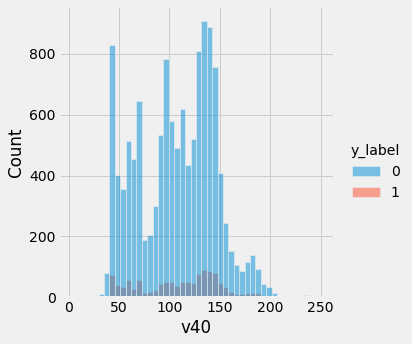

In [ ]:
# 기존 v40의 범위가 너무 커서 최댓값을 250으로 제한하였습니다.
# 250 이후 구간에서도 거의 값이 관측되지 않기 때문에 최댓값을 제한하는 것이 더 보기 편할 것입니다.
temp_train = train[train["v40"] < 250]
sns.displot(x=temp_train.v40, hue = temp_train.y_label)

- 일반적으로 점도가 높을수록 되고, 점도가 낮을수록 묽습니다.
- 정상오일:비정상오일의 비율은 약 10:1이고, 해당 그래프에서 10:1정도로 관측되고 있습니다.
- 점도가 될수록 이상일 확률이 낮아지는 것으로 보입니다. 다만, 150 이후 데이터가 적은 편이기 때문에 확실하진 않습니다.

# 학습

In [ ]:
categorical_features = ['component_arbitrary']

le = LabelEncoder()
for col in categorical_features:    
    x_train[col] = le.fit_transform(x_train[col])
    if col in x_test.columns:
        x_test[col] = le.transform(x_test[col])

In [ ]:
def get_values(value):
    return value.values.reshape(-1, 1)

for col in x_train.columns:
    if col not in categorical_features:
        scaler = StandardScaler()
        x_train[col] = scaler.fit_transform(get_values(x_train[col]))
        if col in x_test.columns:
            x_test[col] = scaler.transform(get_values(x_test[col]))

In [ ]:
x_train.drop(["y_label"], axis = 1, inplace = True)

In [ ]:
# 오버샘플링 -> 라벨 불균형 해소를 위한 방법(비정상 오일이 관측된 수가 적기 때문)
from imblearn.over_sampling import SMOTE
oversampling_instance = SMOTE(k_neighbors = 4, random_state = 2022) # 이웃 4개와 비교하여 y_label이 1인 데이터를 증강합니다.
                                                                    # component가 4개 이므로 이웃의 수를 4로 설정했습니다.

over_x, over_y = oversampling_instance.fit_resample(x_train,y_train)

# over_x = pd.DataFrame(over_x, columns = x_train.columns)
over_y = pd.Series(over_y)

# pca 사용시 주석 해제
over_x = pd.DataFrame(over_x)
x_train = pd.DataFrame(x_train)

over_y.value_counts()

0    12892
1    12892
Name: y_label, dtype: int64

In [ ]:
x_train = pd.concat([x_train, over_x])
y_train = pd.concat([y_train, over_y])

In [ ]:
# 차원축소(pca) -> 오버샘플링이 과적합을 만들 우려를 피하기 위하여 사용합니다.
from sklearn.decomposition import PCA
pca = PCA(n_components=12, random_state = 2022)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

sum(pca.explained_variance_ratio_)

0.911124594234422

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.2, stratify = y_train, random_state = 2022)

In [ ]:
# ! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 22 kB/s 


In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

rf = RandomForestClassifier(n_estimators = 250, random_state=2022)
cat = CatBoostClassifier(learning_rate=0.1, n_estimators = 250, random_state = 2022)
lgbm = LGBMClassifier(n_estimators = 250, random_state = 2022)
dt = DecisionTreeClassifier(random_state=2022)


voting= VotingClassifier(estimators=[('rf', rf), ('cat', cat), ("lgbm", lgbm), ("dt", dt)], voting='soft')
voting.fit(x_train,y_train)

# validation = voting.predict(X_val)
# validation = rf.predict(X_val)
# print(f1_score(Y_val, validation, average = "macro"))

0:	learn: 0.6771745	total: 61.2ms	remaining: 15.3s
1:	learn: 0.6629429	total: 74ms	remaining: 9.18s
2:	learn: 0.6515285	total: 86.3ms	remaining: 7.1s
3:	learn: 0.6413670	total: 99.1ms	remaining: 6.1s
4:	learn: 0.6328258	total: 112ms	remaining: 5.49s
5:	learn: 0.6258034	total: 125ms	remaining: 5.1s
6:	learn: 0.6193871	total: 139ms	remaining: 4.82s
7:	learn: 0.6140268	total: 152ms	remaining: 4.59s
8:	learn: 0.6098925	total: 164ms	remaining: 4.4s
9:	learn: 0.6062318	total: 177ms	remaining: 4.25s
10:	learn: 0.6030778	total: 189ms	remaining: 4.11s
11:	learn: 0.5996549	total: 212ms	remaining: 4.2s
12:	learn: 0.5967126	total: 225ms	remaining: 4.09s
13:	learn: 0.5942526	total: 237ms	remaining: 4s
14:	learn: 0.5918061	total: 250ms	remaining: 3.92s
15:	learn: 0.5893420	total: 265ms	remaining: 3.87s
16:	learn: 0.5870552	total: 278ms	remaining: 3.81s
17:	learn: 0.5856954	total: 291ms	remaining: 3.75s
18:	learn: 0.5842329	total: 306ms	remaining: 3.72s
19:	learn: 0.5824783	total: 318ms	remaining: 3.

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=250,
                                                     random_state=2022)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7f58d898ad60>),
                             ('lgbm',
                              LGBMClassifier(n_estimators=250,
                                             random_state=2022)),
                             ('dt', DecisionTreeClassifier(random_state=2022))],
                 voting='soft')

In [ ]:
# preds = rf.predict(x_test)
preds = voting.predict(x_test)

submit = pd.read_csv('/content/drive/MyDrive/competition_data/dacon/oil_status/sample_submission.csv')
submit['Y_LABEL'] = preds
print(submit["Y_LABEL"].value_counts())

submit.to_csv('./submittt.csv', index=False)

submit.head()

0    5372
1     669
Name: Y_LABEL, dtype: int64


,ID,Y_LABEL
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,1
4,TEST_0004,1
